<a href="https://colab.research.google.com/github/kharerahul002/Forecasting-Models/blob/master/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import numpy as np
import quandl

In [0]:
quandl.ApiConfig.api_key = 'knewsUunFYUMpN7y7xKn'
data = quandl.get('BSE/BOM500325') #reliance
data

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1991-01-02,115.0,115.00,105.00,107.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,-7.50
1991-01-03,107.5,107.50,95.00,97.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,12.50,-10.00
1991-01-07,105.0,107.50,97.50,105.00,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,0.00
1991-01-09,105.0,105.00,101.25,102.50,0.00,0.0,0.0,0.000000e+00,NaN,NaN,3.75,-2.50
1991-01-11,102.5,110.00,100.00,108.75,0.00,0.0,0.0,0.000000e+00,NaN,NaN,10.00,6.25
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-24,1354.9,1495.00,1348.00,1417.35,1426.94,2452068.0,84839.0,3.498957e+09,298577.0,12.18,147.00,62.45
2020-04-27,1440.0,1474.55,1422.95,1430.30,1449.14,1152767.0,42860.0,1.670522e+09,204866.0,17.77,51.60,-9.70
2020-04-28,1451.4,1454.75,1391.95,1428.10,1421.15,1301548.0,49487.0,1.849695e+09,159436.0,12.25,62.80,-23.30


In [0]:
data['Open'].isnull()

Date
1991-01-02    False
1991-01-03    False
1991-01-07    False
1991-01-09    False
1991-01-11    False
              ...  
2020-04-24    False
2020-04-27    False
2020-04-28    False
2020-04-29    False
2020-04-30    False
Name: Open, Length: 7091, dtype: bool

In [0]:
median = data['Open'].median()
data['Open'].fillna(median, inplace=True)

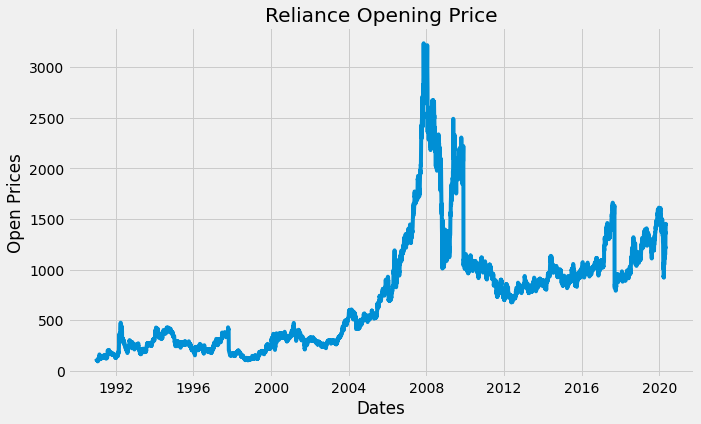

In [0]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Open Prices')
plt.plot(data['Open'])
plt.title('Reliance Opening Price')
plt.show()

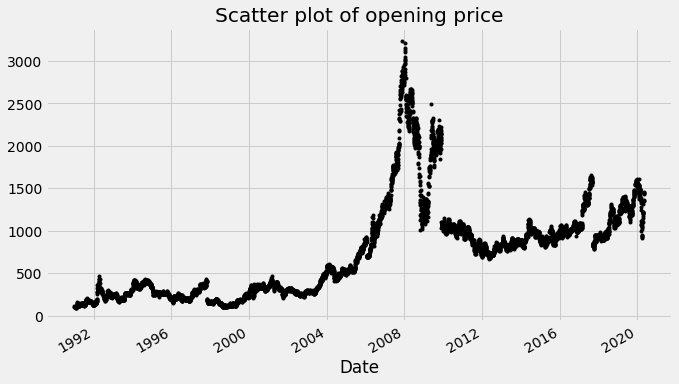

In [0]:
df_open = data['Open']
df_open.plot(style='k.')
plt.title('Scatter plot of opening price')
plt.show()

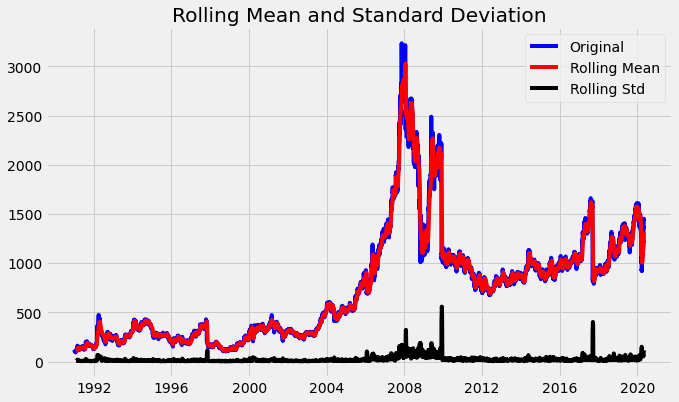

Results of dickey fuller test
Test Statistics                  -2.086881
p-value                           0.249822
No. of lags used                 33.000000
Number of observations used    7057.000000
critical value (1%)              -3.431277
critical value (5%)              -2.861950
critical value (10%)             -2.566988
dtype: float64


In [0]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_open)

<Figure size 720x432 with 0 Axes>

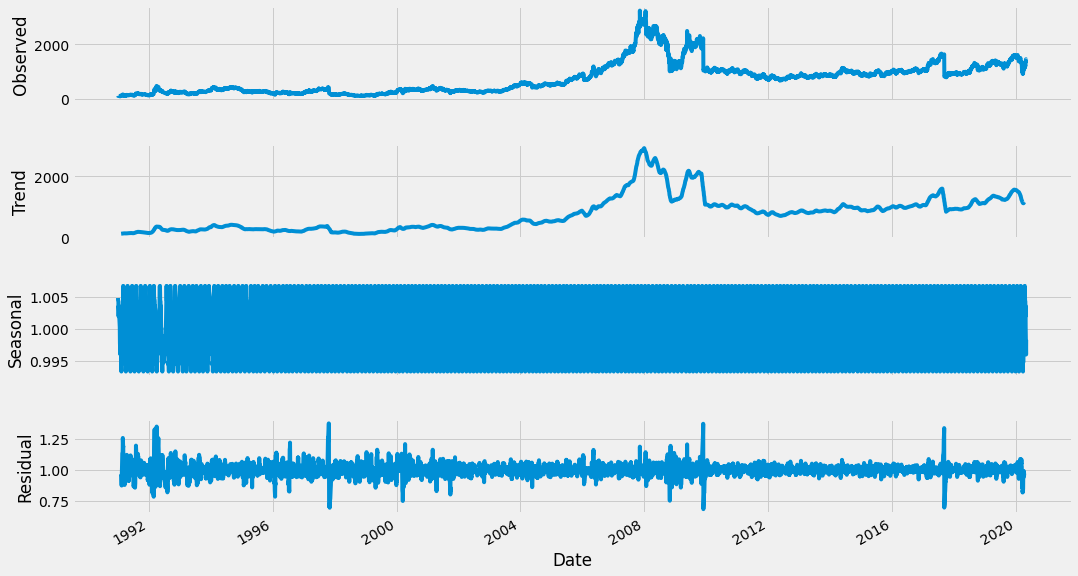

In [0]:
result = seasonal_decompose(df_open, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

No handles with labels found to put in legend.


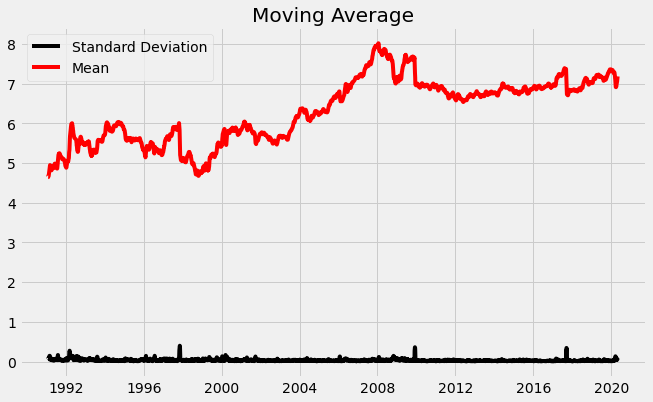

In [0]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_open)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

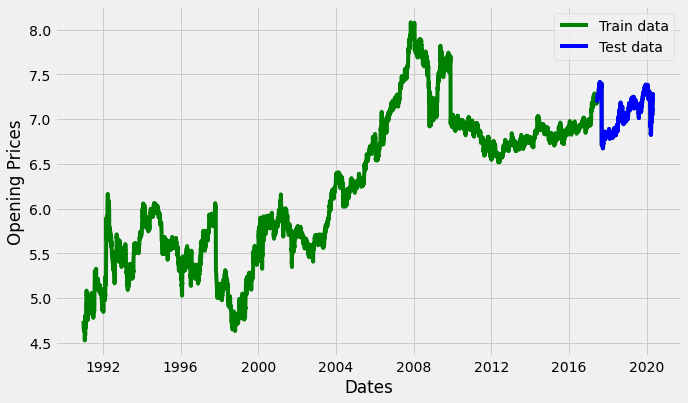

In [0]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Opening Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()


In [0]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-25777.638, BIC=-25764.117, Time=0.547 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-25792.666, BIC=-25772.385, Time=0.377 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-25792.755, BIC=-25772.474, Time=1.868 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-25778.662, BIC=-25771.902, Time=0.250 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-25790.787, BIC=-25763.746, Time=2.207 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-25790.763, BIC=-25763.721, Time=1.862 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-25788.941, BIC=-25755.138, Time=2.524 seconds
Total fit time: 9.669 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 6378
Model:               SARIMAX(0, 1, 1)   Log Likelihood               12899.377
Date:            

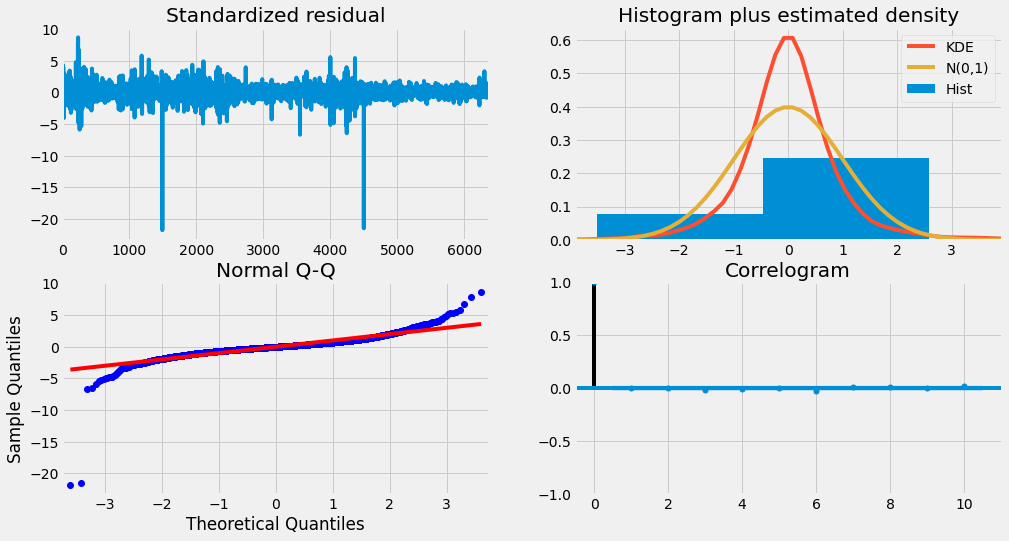

In [0]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [0]:
model = ARIMA(train_data, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:                 D.Open   No. Observations:                 6377
Model:                 ARIMA(0, 1, 1)   Log Likelihood               12899.378
Method:                       css-mle   S.D. of innovations              0.032
Date:                Tue, 12 May 2020   AIC                         -25792.756
Time:                        08:16:16   BIC                         -25772.475
Sample:                             1   HQIC                        -25785.735
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.000      1.044      0.297      -0.000       0.001
ma.L1.D.Open    -0.0519      0.013     -4.143      0.000      -0.077      -0.027
                                    Roots   

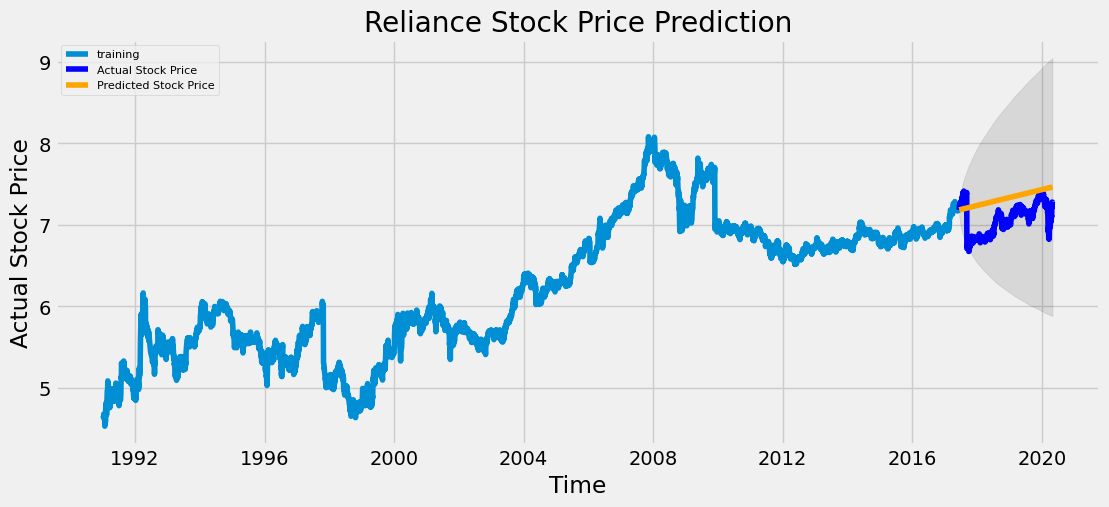

In [0]:
# Forecast
fc, se, conf = fitted.forecast(710, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [0]:
# report performance
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))


MSE: 0.09282827914392686
MAE: 0.27698552807188637
RMSE: 0.3046773361179444
MAPE: 0.03966413797265232
